In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

import pandas as pd
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import RandomSearch, Hyperband


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [45]:
# Load the dataset
HIV_df = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report (1).csv")
HIV_df.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,1.4,1.4,0.0


In [46]:
# # Identify and handle malformed strings
# for column in ['Borough', 'UHF', 'Gender', 'Age', 'Race']:
#     try:
#         # Convert to numeric, replacing 'All' with NaN
#         HIV_df[column] = pd.to_numeric(HIV_df[column], errors='coerce')
#     except ValueError as e:
#         print(f"Error converting column '{column}': {e}")

In [47]:
# Determine the number of unique values in each column.
HIV_df.nunique()

Year                                  10
Borough                                6
UHF                                   43
Gender                                 6
Age                                    8
Race                                   7
HIV diagnoses                        409
HIV diagnosis rate                  1963
Concurrent diagnoses                 157
% linked to care within 3 months     125
AIDS diagnoses                       313
AIDS diagnosis rate                 1525
PLWDHI prevalence                    169
% viral suppression                  170
Deaths                               374
Death rate                           757
HIV-related death rate               422
Non-HIV-related death rate           589
dtype: int64

In [48]:
# check whether it is missing

In [49]:
# Handle missing values
# HIV_df.fillna(HIV_df.mean(), inplace=True)

In [50]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns = ['Borough', 'UHF', 'Gender', 'Age', 'Race']

In [51]:
HIV_df = pd.get_dummies(HIV_df, columns=categorical_columns, drop_first=True, dtype=int)

In [55]:
HIV_df
# likelihood of reduced severity in HIV patients

# likelihood = sigmoid function

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,...,Age_40 - 49,Age_50 - 59,Age_60+,Age_All,Race_Asian/Pacific Islander,Race_Black,Race_Latino/Hispanic,Race_Latinx/Hispanic,Race_Other/Unknown,Race_White
0,2011,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,...,0,0,0,1,0,0,0,0,0,0
1,2011,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,...,0,0,0,1,0,0,0,0,0,0
2,2011,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,...,0,0,0,1,0,0,0,0,0,0
3,2011,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,...,0,0,0,1,0,0,0,0,0,0
4,2011,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,...,0,0,1,0,1,0,0,0,0,0
31921,2021,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0,...,0,0,1,0,0,1,0,0,0,0
31922,2021,0.0,0.0,0.0,NaN,0.0,0.0,0.7,0.5,0,...,0,0,1,0,0,0,0,1,0,0
31923,2021,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
HIV_df.columns

Index(['Year', 'HIV diagnoses', 'HIV diagnosis rate', 'Concurrent diagnoses',
       '% linked to care within 3 months', 'AIDS diagnoses',
       'AIDS diagnosis rate', 'PLWDHI prevalence', '% viral suppression',
       'Deaths', 'Death rate', 'HIV-related death rate',
       'Non-HIV-related death rate', 'Borough_Bronx', 'Borough_Brooklyn',
       'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island',
       'UHF_Bayside - Little Neck', 'UHF_Bedford Stuyvesant - Crown Heights',
       'UHF_Bensonhurst - Bay Ridge', 'UHF_Borough Park',
       'UHF_Canarsie - Flatlands', 'UHF_Central Harlem - Morningside Heights',
       'UHF_Chelsea - Clinton', 'UHF_Coney Island - Sheepshead Bay',
       'UHF_Crotona - Tremont', 'UHF_Downtown - Heights - Park Slope',
       'UHF_East Flatbush - Flatbush', 'UHF_East Harlem', 'UHF_East New York',
       'UHF_Flushing - Clearview', 'UHF_Fordham - Bronx Park',
       'UHF_Fresh Meadows', 'UHF_Gramercy Park - Murray Hill',
       'UHF_Greenpoint', 

In [57]:
# Separate features (X) and target variable (y)
X = HIV_df.drop('HIV diagnoses', axis=1)
y = HIV_df['HIV diagnoses']

In [58]:
HIV_df

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,...,Age_40 - 49,Age_50 - 59,Age_60+,Age_All,Race_Asian/Pacific Islander,Race_Black,Race_Latino/Hispanic,Race_Latinx/Hispanic,Race_Other/Unknown,Race_White
0,2011,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,...,0,0,0,1,0,0,0,0,0,0
1,2011,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,...,0,0,0,1,0,0,0,0,0,0
2,2011,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,...,0,0,0,1,0,0,0,0,0,0
3,2011,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,...,0,0,0,1,0,0,0,0,0,0
4,2011,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,...,0,0,1,0,1,0,0,0,0,0
31921,2021,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0,...,0,0,1,0,0,1,0,0,0,0
31922,2021,0.0,0.0,0.0,NaN,0.0,0.0,0.7,0.5,0,...,0,0,1,0,0,0,0,1,0,0
31923,2021,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,...,0,0,1,0,0,0,0,0,1,0


In [59]:
# print (X)

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

#keras.layers.Dropout(rate = 0.5, noise_shape=None, seed=None)

# First hidden layer
model.add(tf.keras.layers.Dense(units=312, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=128, activation='tanh'))

model.add(tf.keras.layers.Dense(units=64, activation='tanh'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 312)               24336     
                                                                 
 dense_20 (Dense)            (None, 128)               40064     
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 72721 (284.07 KB)
Trainable params: 72721 (284.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=2500, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Additional hidden layers
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='tanh'))

# Check the structure of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 2500)              195000    
                                                                 
 dense_24 (Dense)            (None, 64)                160064    
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 8)                 264       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 357417 (1.36 MB)
Trainable params: 357417 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=128, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=64, activation='tanh'))

model.add(tf.keras.layers.Dense(units=32, activation='tanh'))
#kerash drop stuff google it
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming 'history' is the result of your model training
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))


Epoch 1/100
799/799 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4622 - val_loss: nan - val_accuracy: 0.4562
Epoch 2/100
799/799 [==============================] - 1s 993us/step - loss: nan - accuracy: 0.4621 - val_loss: nan - val_accuracy: 0.4562
Epoch 3/100
799/799 [==============================] - 1s 996us/step - loss: nan - accuracy: 0.4621 - val_loss: nan - val_accuracy: 0.4562
Epoch 4/100
799/799 [==============================] - 1s 989us/step - loss: nan - accuracy: 0.4621 - val_loss: nan - val_accuracy: 0.4562
Epoch 5/100
799/799 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4621 - val_loss: nan - val_accuracy: 0.4562
Epoch 6/100
799/799 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4621 - val_loss: nan - val_accuracy: 0.4562
Epoch 7/100
799/799 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4621 - val_loss: nan - val_accuracy: 0.4562
Epoch 8/100
799/799 [==============

In [65]:
#saves model for furture optomization
model.save('freymodel.h5')

C:\Users\Administrator\anaconda3\envs\ml\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model = tf.keras.models.load_model('freymodel.h5')

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=312, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=128, activation='tanh'))

model.add(tf.keras.layers.Dense(units=100, activation='tanh'))
model.add(tf.keras.layers.Dense(units=82, activation='tanh'))
model.add(tf.keras.layers.Dense(units=64, activation='tanh'))
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1664      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
 dense_13 (Dense)            (None, 312)               624       
                                                                 
 dense_14 (Dense)            (None, 128)               40064     
                                                                 
 dense_15 (Dense)            (None, 100)              

In [19]:
model = tf.keras.models.load_model('freymodel.h5')
# Compile the model
model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=['accuracy', 'mse'])

# Train the model
fit_model = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
799/799 [==============================] - 1s 1ms/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0103 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 2/100
799/799 [==============================] - 1s 991us/step - loss: -158.3812 - accuracy: 0.5959 - mse: 4581.0186 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 3/100
799/799 [==============================] - 1s 1ms/step - loss: -158.3812 - accuracy: 0.5959 - mse: 4581.0205 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 4/100
799/799 [==============================] - 1s 991us/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0166 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 5/100
799/799 [==============================] - 1s 994us/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0210 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 6/100
799/799 [==============================] - 1s 9

799/799 [==============================] - 1s 976us/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0205 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 88/100
799/799 [==============================] - 1s 979us/step - loss: -158.3810 - accuracy: 0.5959 - mse: 4581.0220 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 89/100
799/799 [==============================] - 1s 980us/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0156 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 90/100
799/799 [==============================] - 1s 984us/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0200 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 91/100
799/799 [==============================] - 1s 984us/step - loss: -158.3811 - accuracy: 0.5959 - mse: 4581.0200 - val_loss: -158.8272 - val_accuracy: 0.5972 - val_mse: 5096.6445
Epoch 92/100
799/799 [==============================] - 1s 989u

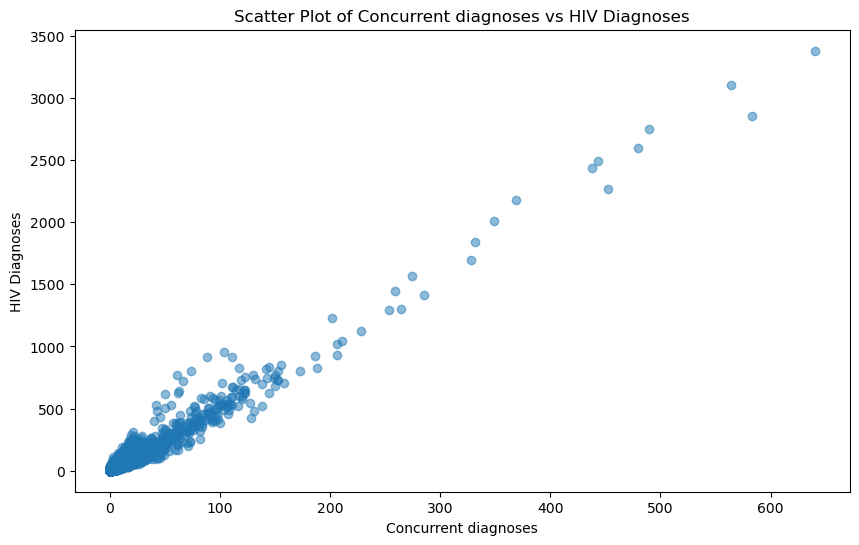

In [20]:
import matplotlib.pyplot as plt

# Assuming 'HIV_df' is your DataFrame and 'feature_name' is the feature you want to plot
feature_name = 'Concurrent diagnoses'

plt.figure(figsize=(10, 6))
plt.scatter(HIV_df[feature_name], HIV_df['HIV diagnoses'], alpha=0.5)
plt.title(f'Scatter Plot of {feature_name} vs HIV Diagnoses')
plt.xlabel(feature_name)
plt.ylabel('HIV Diagnoses')
plt.show()


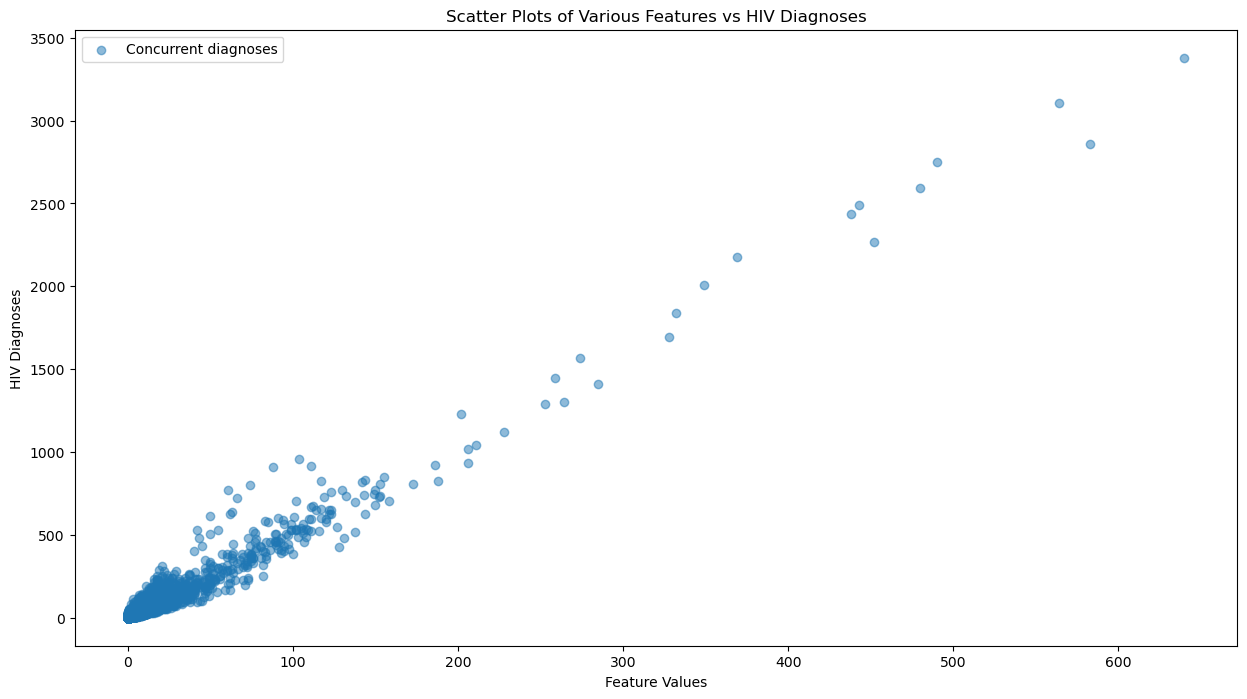

In [21]:
features_to_plot = ['Concurrent diagnoses', 'SomeOtherFeature', 'AnotherFeature']

plt.figure(figsize=(15, 8))
for feature_name in features_to_plot:
    if feature_name in HIV_df.columns:
        plt.scatter(HIV_df[feature_name], HIV_df['HIV diagnoses'], alpha=0.5, label=feature_name)

plt.title('Scatter Plots of Various Features vs HIV Diagnoses')
plt.xlabel('Feature Values')
plt.ylabel('HIV Diagnoses')
plt.legend()
plt.show()


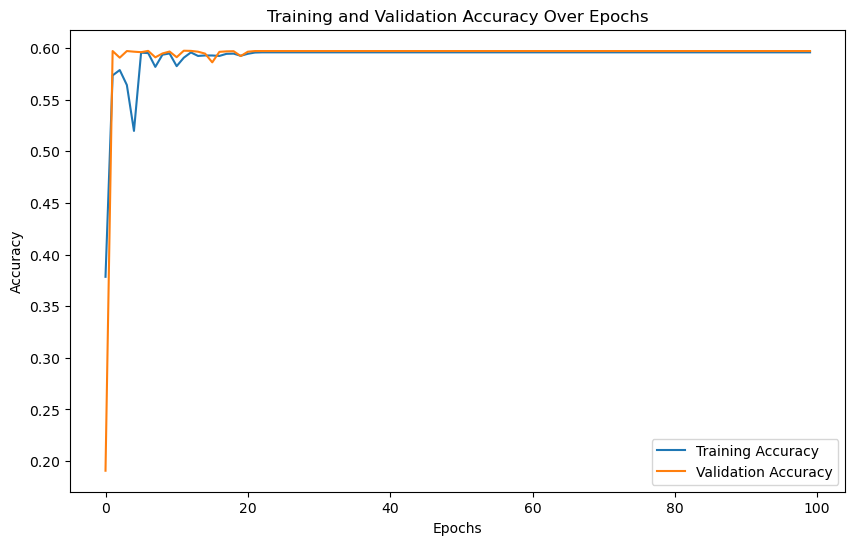

In [22]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


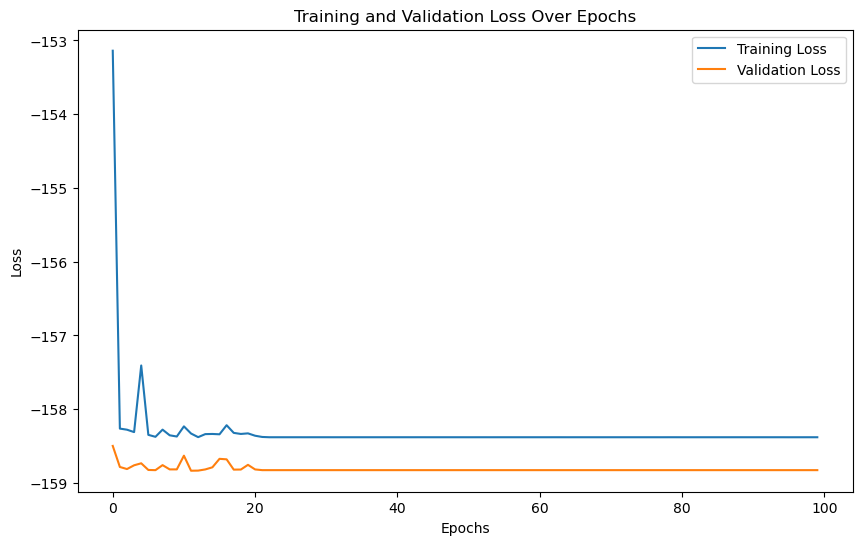

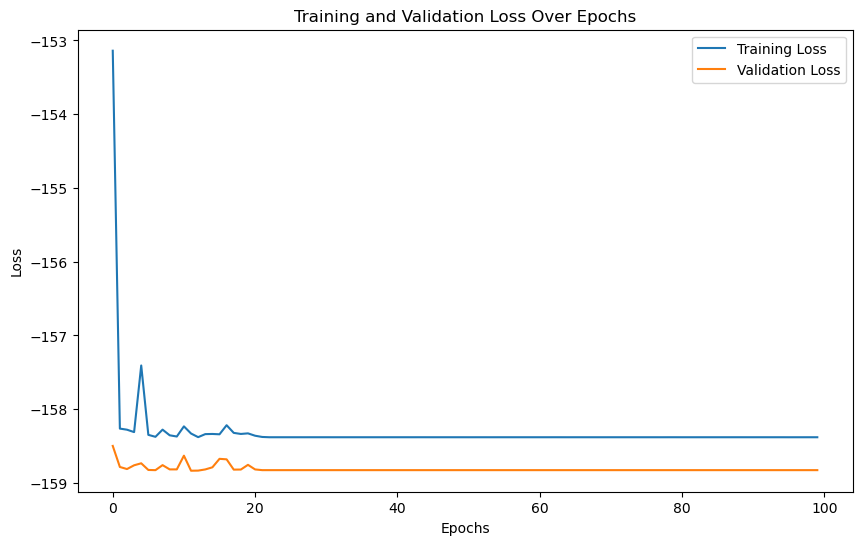

In [23]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

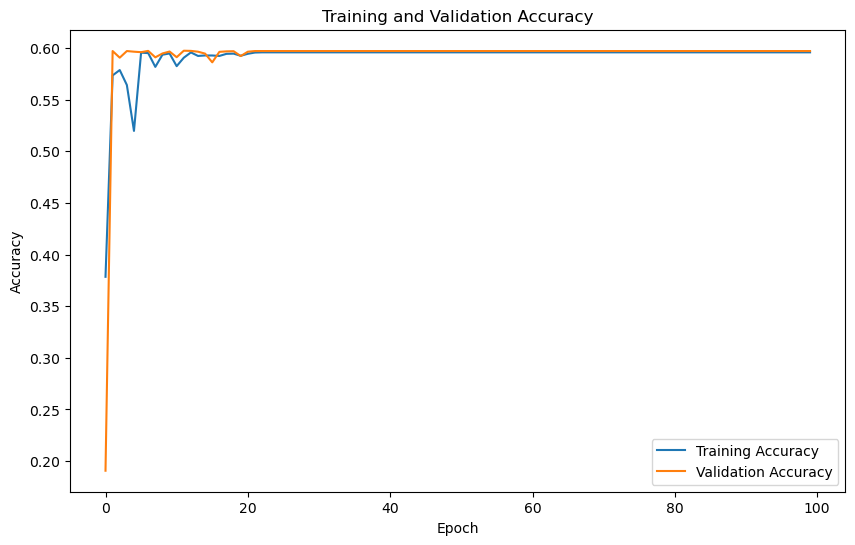

In [24]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


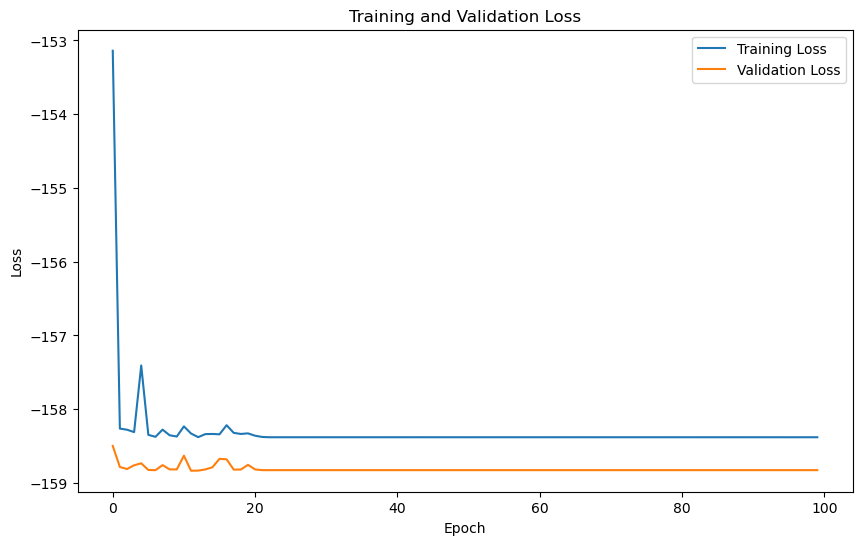

In [25]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
